In [1]:
# %pip install pypandoc
# %pip install underthesea
# %pip install sentence_transformers
# %pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall
%pip install seaborn
%pip install tensorflow
# !pip uninstall -y keras
%pip install keras
%pip install transformers
%pip install itertools

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: D:\jupyter_proj\venv\Scripts\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: D:\jupyter_proj\venv\Scripts\python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: D:\jupyter_proj\venv\Scripts\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: D:\jupyter_proj\venv\Scripts\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement itertools (from versions: none)
ERROR: No matching distribution found for itertools

[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: D:\jupyter_proj\venv\Scripts\python.exe -m pip install --upgrade pip


In [2]:
# !pip install GPUtil

In [3]:
# import torch
# from GPUtil import showUtilization as gpu_usage

In [4]:
# import cudf, cuml
import pickle
from nltk.classify import SklearnClassifier
from transformers import GPT2Tokenizer
import asyncio
import base64
import decimal
import json
from datetime import datetime, date
import os
from pathlib import Path

import flask
# import pymysql
import requests
from flask import Flask, render_template, request
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import label_binarize
# from sklearn.svm import LinearSVC, SVC
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
# from cuml.svm import SVC, LinearSVC
# from sklearn import tree
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, roc_curve, auc,  confusion_matrix, recall_score, precision_score, f1_score, RocCurveDisplay, ConfusionMatrixDisplay, auc
from sklearn.multiclass import OneVsRestClassifier
import openpyxl
import pandas as pd
import numpy as np
import preprocess_kgptalkie as ps
import re
import glob
import os
from underthesea import sentiment, pos_tag, word_tokenize
from flask import g
from sklearn.pipeline import Pipeline
import underthesea
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from pandas.errors import ParserError
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
import os.path
import pypandoc

import seaborn as sns

import tensorflow as tf
import keras
from keras import layers

from itertools import cycle

D:\jupyter_proj\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
D:\jupyter_proj\venv\Lib\site-packages\cupy\_environment.py:216: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


In [5]:
SIZE_DEMO = 20000

root = '/dataset/**/'
root2 = '/sentiment_transformer/other_dataset/'


# print(all_files)


def get_stopwords_list(stop_file_path):
    """load stop words """

    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        return list(frozenset(stop_set))


stopwords_path = "vietnamese.txt"
stopwords = get_stopwords_list(stopwords_path)


def load_transformer_model():
    print(os.path.isdir("model"))
    if not os.path.isdir("model"):
        model = SentenceTransformer('keepitreal/vietnamese-sbert')
        model.save("model")
        return model
    return SentenceTransformer('model')


def get_clean(x):
#     print(x)
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    # x = str(x).lower()
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    # x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x


# def get_clean_row(x):
#     x = x.str.lower().
# #     x = x.str.lower().replace('\\', '').replace('_', ' ')
#     # x = str(x).lower()
# #     x = ps.cont_exp(x)
# #     x = ps.remove_emails(x)
# #     x = ps.remove_urls(x)
# #     x = ps.remove_html_tags(x)
# #     # x = ps.remove_accented_chars(x)
# #     x = ps.remove_special_chars(x)
# #     x = re.sub("(.)\\1{2,}", "\\1", x)
#     return x


def load_data_train_to_excel(root):
    data_train = pd.DataFrame()
    all_files_train = glob.glob(root + "train/**/*.txt", recursive=True)
    for f in all_files_train:
        df = pd.read_csv(f, header=None, sep=' ', names=['Review', 'Sentiment'], on_bad_lines='skip')
        with open(f, mode='r', encoding="utf8") as f:
            df['Review'] = get_clean(f.read())
            df['Sentiment'] = ""
        data_train = pd.concat([data_train, df], ignore_index=True)
        # print(data)
    data_train.to_csv('data_train.csv', index=False)


def remove_stop_words(corpus, stop_words):
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))

    return results


# i=-1
# all_files_test = glob.glob(f'{root}test/{i}/*.txt', recursive=True)
# for f in all_files_test:
#     df = pd.read_csv(f, header=None, sep = ' ', names = ['Review','Sentiment'], on_bad_lines='skip')
#     with open(f, mode='r', encoding="utf8") as f:
#         df['Review'] = get_clean(f.read())
#         df['Sentiment'] = "negative"
#     data_test = pd.concat([data_test, df], ignore_index=True)
#     print(data_test)


def load_data_test_to_excel(root):
    data_test = pd.DataFrame()
    sentiment_array = ["negative", "positive", "neutral"]
    all_files_test = []
    for i in [-1, 1, 2]:
        all_files_test = glob.glob(f'{root}test/{i}/*.txt', recursive=True)
        print(i)
        for f in all_files_test:
            df = pd.read_csv(f, header=None, sep=' ', names=['Review', 'Sentiment'], on_bad_lines='skip',
                             quoting=csv.QUOTE_NONE)
            with open(f, mode='r', encoding="utf8") as f:
                df['Review'] = get_clean(f.read())
                df['Sentiment'] = sentiment_array[(i + 1) if i == -1 else i]
            data_test = pd.concat([data_test, df], ignore_index=True)
            # print(data_test
    data_test.to_csv('data_test.csv', index=False)


def load_data_test_to_excel2(root):
    data_test = pd.DataFrame()
    sentiment_array = ["nv_tot", "nv_xau", "shop_tot", "shop_xau", "sp_tot", "sp_xau"]
    all_files_test = []
    for i in sentiment_array:
        all_files_test = glob.glob(f'{root}{i}/*.txt', recursive=True)
        print(i)
        for f in all_files_test:
            df = pd.read_csv(f, header=None, sep=' ', names=['Review', 'Sentiment'], on_bad_lines='skip',
                             quoting=csv.QUOTE_NONE)
            with open(f, mode='r', encoding="utf8") as f:
                df['Review'] = get_clean(f.read())
                df['Sentiment'] = i
            data_test = pd.concat([data_test, df], ignore_index=True)
            # print(data_test
    data_test.to_csv('data_test2.csv', index=False)


def convert_docx_to_txt(root):
    # data_test = pd.DataFrame()
    sentiment_array = ["nv_tot", "nv_xau", "shop_tot", "shop_xau", "sp_tot", "sp_xau"]
    all_files_test = []
    for i in sentiment_array:
        all_files_test = glob.glob(f'{root}{i}/*.docx', recursive=True)
        # print(i)
        for f in all_files_test:
            docxFilename = f'{root}{i}/{Path(f).stem}{Path(f).suffix}'
            output = pypandoc.convert_file(docxFilename, 'plain', outputfile=f'{root}{i}/{Path(f).stem}.txt')
            os.remove(f'{root}{i}/{Path(f).stem}{Path(f).suffix}')
            # with open(f, mode='r', encoding="utf8") as f:
            #     df['Review'] = get_clean(f.read())
            #     df['Sentiment'] = i
            # data_test = pd.concat([data_test, df], ignore_index=True)
            # print(data_test
    # data_test.to_csv('data_test2.csv', index=False)


# convert_docx_to_txt(root2)

# load_data_train_to_excel(root)
# load_data_test_to_excel(root)
# load_data_test_to_excel2(root2)


def get_clean_slang_misspell(x):
#     doc = underthesea.word_tokenize(x.lower())
    # docs_slang = [underthesea.word_tokenize(sent.lower()) for sent in df_slang['Slangs']]
    # docs_slang_value = [underthesea.word_tokenize(sent.lower()) for sent in df_slang['Values']]
    # docs_slang_word = [underthesea.word_tokenize(sent.lower()) for sent in df_slang_word['Slangs']]
    # docs_slang_word_value = [underthesea.word_tokenize(sent.lower()) for sent in df_slang_word['Values'].astype(str)]
    # docs_misspell_wrong = [underthesea.word_tokenize(sent.lower()) for sent in df_misspell['wrong']]
    # docs_misspell_right = [underthesea.word_tokenize(sent.lower()) for sent in df_misspell['right']]

    # sentences_wrong = []
    # for sent in docs_misspell_wrong:
    #     k = []
    #     for w in sent:
    #         k.append(w.replace(" ", "_"))
    #     sentences_wrong.append(" ".join(k))
    # # print(f'wrong: {sentences_wrong}')
    # # print(f'right: {docs_misspell_right}')
    # sentences_right = []
    # for sent in docs_misspell_right:
    #     k = []
    #     for w in sent:
    #         k.append(w.replace(" ", "_"))
    #     sentences_right.append(" ".join(k))
    # # print(f'right: {sentences_right}')
    # df_misspell_pd = df_misspell.to_pandas()
    # df_slang_word_pd = df_slang_word.to_pandas()
    # df_slang_pd = df_slang.to_pandas()
    for idx, row in df_misspell.iterrows():
        if row['wrong'] in x:
            x = x.replace(row['wrong'], row['right'])
#         doc = [w.replace(row['wrong'], row['right']) for w in doc]

    for idx, row in df_slang_word.iterrows():
        if row['Slangs'] in x:
            x = x.replace(row['Slangs'], row['Values'])
#             doc[doc.index(row['Slangs'])] = row['Values']
    
    for idx, row in df_slang.iterrows():
        if row['Slangs'] in x:
            x = x.replace(row['Slangs'], row['Values'])

    return x

In [6]:
# df = cudf.read_csv('/kaggle/input/dataset/data.csv')
df = pd.read_csv('data.csv')
df.drop_duplicates(subset='Review', keep="first", inplace=True)
# df = df[:500]
# df_slang = cudf.read_csv('/kaggle/input/dataset/sentences.csv', skipinitialspace=True, usecols=['Slangs', 'Values'])
# df_slang_word = cudf.read_csv('/kaggle/input/dataset/words.csv', skipinitialspace=True, usecols=['Slangs', 'Values'])
# df_misspell = cudf.read_csv('/kaggle/input/dataset/dataset.csv', skipinitialspace=True, usecols=['stt', 'wrong', 'right'])
df_slang = pd.read_csv('sentences.csv', skipinitialspace=True, usecols=['Slangs', 'Values'])
df_slang_word = pd.read_csv('words.csv', skipinitialspace=True, usecols=['Slangs', 'Values'])
df_misspell = pd.read_csv('dataset.csv', skipinitialspace=True, usecols=['stt', 'wrong', 'right'])
# print(df_slang)
df

# df_train = pd.read_csv('data_train.csv')

# # existing_file = 'Book2.csv'
# # df = pd.read_csv(existing_file)

,Sentiment,Review,label,num_character,num_of_word,num_sentences
0,nv_tot,Nhân viên luôn nhiệt tình và thân thiện với kh...,0,55,12,1
1,nv_tot,Tôi thực sự ấn tượng với sự chuyên nghiệp của ...,0,62,15,1
2,nv_tot,Tôi thực sự ấn tượng với sự chuyên nghiệp của ...,0,65,15,1
3,nv_tot,Nhân viên rất nhiệt tình và thân thiện với mọi...,0,62,14,1
4,nv_tot,Dịch vụ tuyệt vời và nhân viên luôn sẵn sàng g...,0,70,17,1
...,...,...,...,...,...,...
1232,sp_xau,"""Dây đeo rất cứng và thô, đeo vào tay cảm thấy...",5,65,17,1
1233,sp_xau,""" chất lượng sản phẩm tuyệt vời . thời gian gi...",5,122,32,3
1234,sp_xau,""" lon nào cũng bị mốp vỏ hết ""\n",5,31,9,1
1235,sp_xau,"""Chưa lột sạch mụn hẳn ""\n",5,25,7,1


In [7]:
# CLASS_NAMES = list(df["Sentiment"].to_pandas().unique())
CLASS_NAMES = list(df["Sentiment"].unique())
CLASS_NAMES

['nv_tot', 'nv_xau', 'shop_tot', 'shop_xau', 'sp_tot', 'sp_xau']

In [8]:
# df['Review'] = df['Review'].astype('U')

# df['Review'].str.lower()

# df = df.to_pandas()

# df['Review'] = df['Review'].to_pandas().apply(get_clean)
df['Review'] = df['Review'].map(get_clean)
# df['Review']


# df['Review'] = df['Review'].to_pandas().map(get_clean_slang_misspell)
df['Review'] = df['Review'].map(get_clean_slang_misspell)

# df = cudf.from_pandas(df_pd)
# df

D:\jupyter_proj\venv\Lib\site-packages\preprocess_kgptalkie\utils.py:97: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(x, 'lxml').get_text().strip()


In [9]:
df['Sentiment'].value_counts()

Sentiment
sp_tot      425
sp_xau      267
shop_tot    152
shop_xau    119
nv_xau      102
nv_tot       51
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x25594dbd610>,
 [Text(0.4022868338109557, 1.0237994448828134, 'sp_tot'),
  Text(-1.0999956412997425, -0.0030966306800321096, 'sp_xau'),
  Text(-0.41665673061351954, -1.018035936907167, 'shop_tot'),
  Text(0.4022869057022213, -1.023799416634202, 'shop_xau'),
  Text(0.9235482297176578, -0.5975438623108605, 'nv_xau'),
  Text(1.088683085114632, -0.15738214697127265, 'nv_tot')],
 [Text(0.21942918207870307, 0.5584360608451708, '38.08'),
  Text(-0.5999976225271322, -0.001689071280017514, '23.92'),
  Text(-0.22726730760737426, -0.5552923292220909, '13.62'),
  Text(0.2194292212921207, -0.5584360454368373, '10.66'),
  Text(0.5037535798459951, -0.32593301580592393, '9.14'),
  Text(0.5938271373352537, -0.08584480743887597, '4.57')])

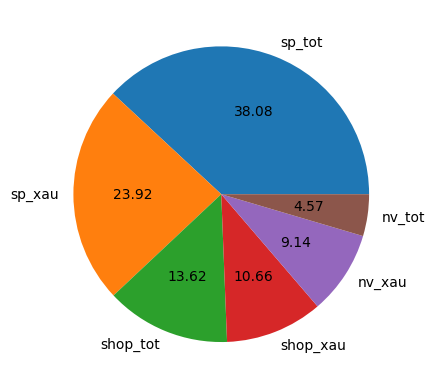

In [10]:
sentiment_counts = df['Sentiment'].value_counts()
# plt.pie(sentiment_counts.to_cupy().get(), labels=sentiment_counts.to_pandas().index, autopct='%0.2f')
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%0.2f')

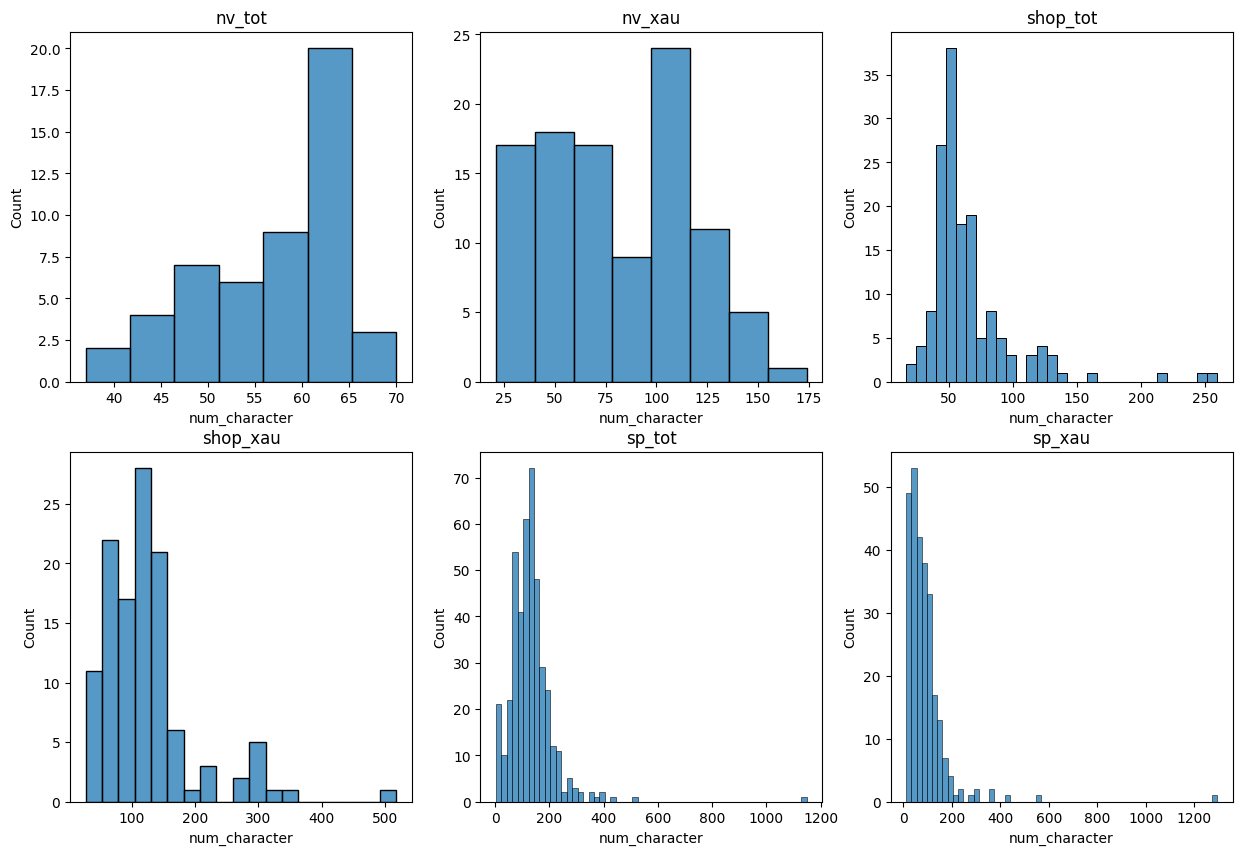

In [11]:
plt.figure(figsize=(15, 10))
# df_pd = df.to_pandas()
for i in range(len(CLASS_NAMES)):
    plt.subplot(2, 3, i+1)
    # sns.histplot(data=df_pd[df_pd['Sentiment']==CLASS_NAMES[i]], x="num_character")
    sns.histplot(data=df[df['Sentiment']==CLASS_NAMES[i]], x="num_character")
    plt.title(CLASS_NAMES[i])

<Figure size 1500x500 with 0 Axes>

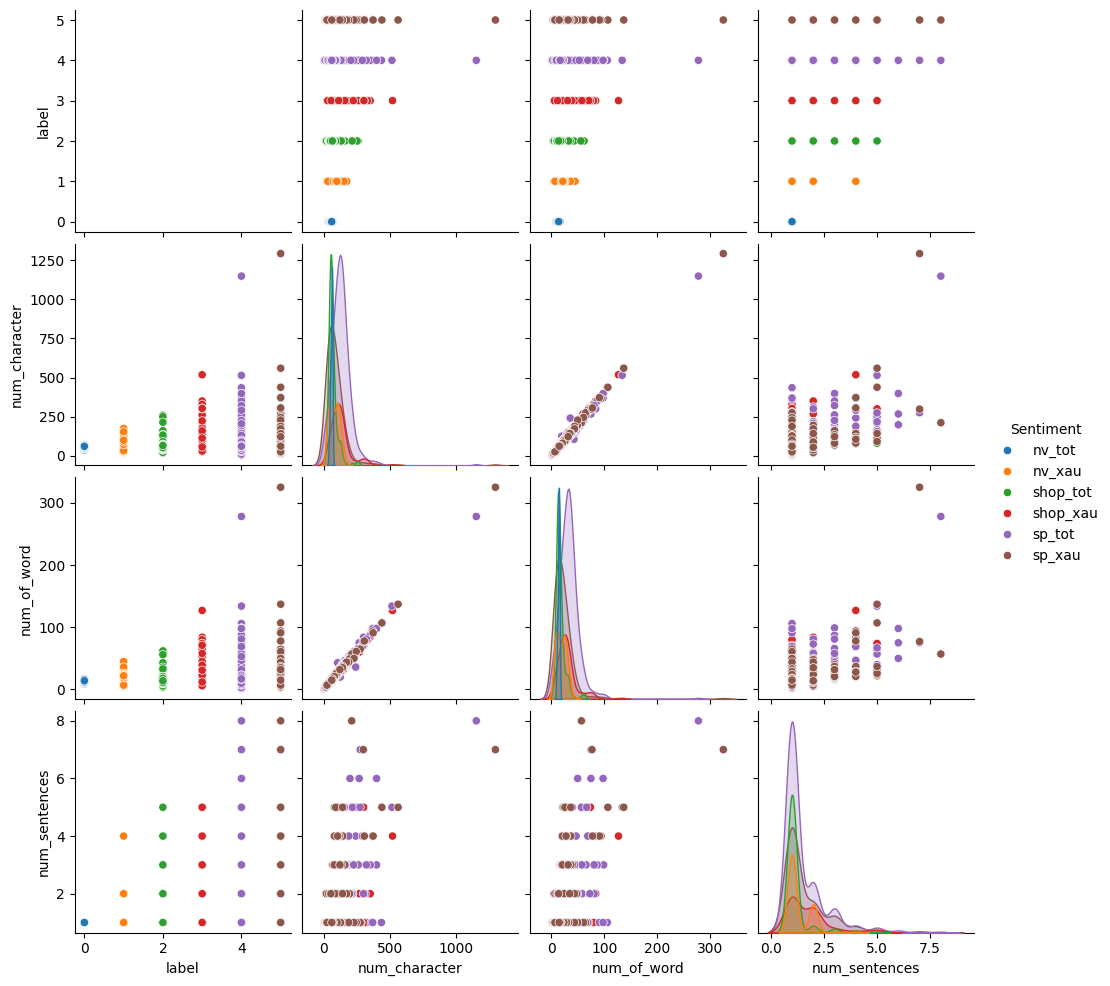

In [12]:
plt.figure(figsize=[15,5])
# sns.pairplot(df.to_pandas(), hue='Sentiment')
sns.pairplot(df, hue='Sentiment')

In [13]:
# list_review = df['Review'].to_list()

In [14]:
# max_length = max(len(x.split(" ")) for x in list_review)
# print(max_length)

In [15]:
# tokenizer = GPT2Tokenizer.from_pretrained('NlpHUST/gpt2-vietnamese')
# tokenizer.pad_token = tokenizer.eos_token
# vocab = tokenizer.get_vocab()

In [16]:
# sequences = tokenizer.batch_encode_plus( list_review,
#     add_special_tokens=True,
#     padding='longest',      
#     truncation=True,         
#     max_length=max_length,            
#     return_tensors='tf',
                                         
# )['input_ids'].numpy()

In [17]:
# docs = [underthesea.word_tokenize(doc.lower()) for doc in df['Review'].to_pandas()]
model = load_transformer_model()
docs = [underthesea.word_tokenize(doc.lower()) for doc in df['Review']]

sentences = []
for sent in docs:
    k = []
    for w in sent:
        k.append(w.replace(" ", "_"))
    sentences.append(" ".join(k))
    
embeddings = model.encode(sentences,batch_size=31, show_progress_bar=True)

train_texts, val_texts, train_labels, val_labels = train_test_split(embeddings, df['label'], test_size=0.3,
                                                                      random_state=0)
# train_texts2, val_texts2, train_labels2, val_labels2 = train_test_split(sequences, df['label'], test_size=0.3,
#                                                                       random_state=0)
# model.to("cuda")


def preprocess(docs):
    return [underthesea.word_tokenize(doc.lower()) for doc in docs]


def get_vocabularies(tokenized_docs):
    vocabs = set()
    for doc in tokenized_docs:
        vocabs.update(doc)
    return vocabs


def identity_tokenizer(text):
    return text

# docs = [underthesea.word_tokenize(doc.lower()) for doc in train_texts.to_pandas()]
# docs = [underthesea.word_tokenize(doc.lower()) for doc in train_texts]

# sentences = []
# for sent in docs:
#     k = []
#     for w in sent:
#         k.append(w.replace(" ", "_"))
#     sentences.append(" ".join(k))
    
# # embeddings = model.encode(sentences,batch_size=31, show_progress_bar=True, device="cuda")
# embeddings = model.encode(sentences,batch_size=31, show_progress_bar=True)

True


Batches: 100%|█████████████████████████████████████████████████████████████████████████| 36/36 [02:44<00:00,  4.58s/it]


In [18]:
# # y_train_onehot = keras.utils.to_categorical(train_labels.to_cupy().get(), num_classes=6)
# # y_test_onehot = keras.utils.to_categorical(val_labels.to_cupy().get(), num_classes=6)
# y_train_onehot = keras.utils.to_categorical(train_labels2, num_classes=6)
# y_test_onehot = keras.utils.to_categorical(val_labels2, num_classes=6)

In [19]:
# # x_train = tf.reshape(train_texts.to_pandas(), (*train_texts.shape, 1))
# # x_test = tf.reshape(val_texts.to_pandas(), (*val_texts.shape, 1))
# x_train = tf.reshape(train_texts2, (*train_texts2.shape, 1))
# x_test = tf.reshape(val_texts2, (*val_texts2.shape, 1))

In [20]:
# print("Initial GPU Usage")
# gpu_usage()    

In [21]:
clf2 = None
import os.path
if os.path.isfile('model_lgr.model'):
    with open('model_lgr.model', 'rb') as f:
        clf2 = pickle.load(f)
# print(clf2)
if clf2 is None:
    clf2 = LogisticRegression().fit(train_texts, train_labels)

In [22]:
# train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train_onehot)).batch(8).cache().shuffle(buffer_size=len(x_train)//8)
# test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test_onehot)).batch(8).cache().shuffle(buffer_size=len(x_test)//8)

In [23]:
# for batch in train_ds.take(1):
#     for seq, label in zip(batch[0], batch[1]):
#         seq = seq.numpy()
#         label = label.numpy().argmax()
#         review =  tokenizer.decode(seq.reshape(max_length, ), skip_special_tokens=True)
#         sentiment = CLASS_NAMES[label]
        
#         print(f"{review} => {sentiment}({label})\n")    

In [24]:
tokenized_docs = train_texts[:SIZE_DEMO].astype('U')
tokenized_docs_val = val_texts[:SIZE_DEMO].astype('U')
# tokenized_docs_test = test_texts[:SIZE_DEMO].astype('U')
#
# tfidf = TfidfVectorizer(analyzer="word", tokenizer=identity_tokenizer, token_pattern=None, lowercase=False)
# tfidf = TfidfVectorizer(analyzer="word", tokenizer=underthesea.word_tokenize, token_pattern=None, lowercase=False)
# print(tokenized_docs[:100])
# X_train = tfidf.fit_transform(tokenized_docs)
# print(X_train)
# X_train.shape
# y_train = train_labels[:SIZE_DEMO]
# X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2,
#                                                                                 random_state=0)
# print(sentences)

# clf = LinearSVC().fit(embeddings, y_train)


# clf = tree.DecisionTreeClassifier().fit(X_train, y_train)
# clf = MultinomialNB().fit(X_train, y_train)
# clf = RandomForestClassifier().fit(X_train, y_train)


# def val_process(tfidf, clf):
#     X_val = tfidf.transform(tokenized_docs_val)
#     val_predictions = clf.predict(X_val)
#     val_accuracy = accuracy_score(val_labels[:SIZE_DEMO], val_predictions)
#     print(f"Validation Accuracy: {val_accuracy:.4f}")
#     print(classification_report(val_labels[:SIZE_DEMO], val_predictions))

#     # docs_new = ['God is love', 'OpenGL on the GPU is fast']
#     # X_new_tfidf = tfidf.transform(docs_new)

#     # y_pred = clf.predict(X_new_tfidf)

#     # for doc, category in zip(docs_new, y_pred):
#     #     print('%r => %s' % (doc, category))

#     # X_new_tfidf = tfidf.transform(test_texts)

#     # predicted = clf.predict(X_new_tfidf)

#     # np.mean(predicted == test_labels)

#     param_grid = {
#         'C': [0.1, 1, 10, 100, 1000],
#         # 'max_iter': [1000, 5000, 10000],
#     }

#     # tree_param = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

#     # parameters = {
#     #     'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)
#     # }

#     # parameters = {
#     #     'max_depth':[3,5,10,None],
#     #               'n_estimators':[10,100,200],
#     #               'max_features':[1,3,5,7],
#     #               'min_samples_leaf':[1,2,3],
#     #               'min_samples_split':[1,2,3]
#     # }

#     # Initialize GridSearchCV
#     grid_search = GridSearchCV(LinearSVC(), param_grid, cv=3, refit=True, scoring='accuracy')

#     # grid_search = GridSearchCV(tree.DecisionTreeClassifier(), tree_param, cv=3, refit = True, scoring='accuracy')

#     # grid_search = GridSearchCV(MultinomialNB(), parameters, cv=3, refit = True, scoring='accuracy')

#     # grid_search = GridSearchCV(RandomForestClassifier(), parameters, cv=3, refit = True, scoring='accuracy')

#     # Fit the grid search
#     grid_search.fit(X_train, train_labels[:SIZE_DEMO])

#     # Best parameters
#     best_params = grid_search.best_params_
#     print(f"Best Parameters: {best_params}")

#     # Evaluate best model on validation set
#     best_model = grid_search.best_estimator_
#     val_predictions = best_model.predict(X_val)
#     val_accuracy = accuracy_score(val_labels[:SIZE_DEMO], val_predictions)
#     print(f"Validation Accuracy with Best Model: {val_accuracy:.4f}")
#     print(classification_report(val_labels[:SIZE_DEMO], val_predictions))


In [25]:


# def val_process2(model, clf):
#     nv_tot_val = val_texts[val_labels[val_labels == "nv_tot"].index]
#     nv_xau_val = val_texts[val_labels[val_labels == "nv_xau"].index]
#     shop_tot_val = val_texts[val_labels[val_labels == "shop_tot"].index]
#     shop_xau_val = val_texts[val_labels[val_labels == "shop_xau"].index]
#     sp_tot_val = val_texts[val_labels[val_labels == "sp_tot"].index]
#     sp_xau_val = val_texts[val_labels[val_labels == "sp_xau"].index]
#     nv_tot_val = nv_tot_val[:2000]
#     nv_tot_val = pd.concat([nv_tot_val, nv_xau_val[:2000]])
#     nv_tot_val = pd.concat([nv_tot_val, shop_tot_val[:2000]])
#     nv_tot_val = pd.concat([nv_tot_val, shop_xau_val[:2000]])
#     nv_tot_val= pd.concat([nv_tot_val, sp_tot_val[:2000]])
#     nv_tot_val= pd.concat([nv_tot_val, sp_xau_val[:2000]])
#     docs_val = [underthesea.word_tokenize(sent.lower()) for sent in nv_tot_val]
#     sentences_val = []
#     for sent in docs_val:
#         k = []
#         for w in sent:
#             k.append(w.replace(" ", "_"))
#         sentences_val.append(" ".join(k))
#     # print(len(sentences))
#     embeddings_val = model.encode(sentences_val, show_progress_bar=True)
#     # X_val = tfidf.transform(tokenized_docs_val)
#     val_predictions = clf.predict(embeddings_val)
#     # val_predictions = clf.predict(X_val)
#     val_accuracy = accuracy_score(val_labels[:SIZE_DEMO], val_predictions)
#     print(f"Validation Accuracy: {val_accuracy:.4f}")
#     print(classification_report(val_labels[:SIZE_DEMO], val_predictions))


# # val_process(tfidf, clf)

# # val_process2(model, clf)


# def train_demo(df_train, tfidf, clf):
#     for index, row in df_train.iterrows():
#         X_val = tfidf.transform([row['Review']])
#         row['Sentiment'] = str(clf.predict(X_val)).strip('[]\'')
#         print(f"{row['Review']}=>{row['Sentiment']}")


def draw_graph(df):
    df_tmp = df
    df_tmp.loc[df_tmp['Sentiment'] == 'positive', 'Sentiment_num'] = 1
    df_tmp.loc[df_tmp['Sentiment'] == 'negative', 'Sentiment_num'] = 0
    df_tmp.loc[df_tmp['Sentiment'] == 'neutral', 'Sentiment_num'] = 2
    # df_tmp2 = pd.DataFrame({
    #     'Sentiment': df_tmp['Sentiment'],
    #     'Sentiment_num': df_tmp['Sentiment_num']
    # })
    plt.figure(figsize=(5,4))
    sns.scatterplot(x='Sentiment', y='Sentiment_num', data=df_tmp)
    plt.show()


def df_transformer(embeddings):
    # nv_tot = df.loc[df['Sentiment'] == "nv_tot"]
    # nv_xau = df.loc[df['Sentiment'] == "nv_xau"]
    # shop_tot = df.loc[df['Sentiment'] == "shop_tot"]
    # shop_xau = df.loc[df['Sentiment'] == "shop_xau"]
    # sp_tot = df.loc[df['Sentiment'] == "sp_tot"]
    # sp_xau = df.loc[df['Sentiment'] == "sp_xau"]
    # nv_tot = nv_tot[:2000]
    # nv_tot = pd.concat([nv_tot, nv_xau.loc[:2000]])
    # nv_tot = pd.concat([nv_tot, shop_tot.loc[:2000]])
    # nv_tot = pd.concat([nv_tot, shop_xau.loc[:2000]])
    # nv_tot = pd.concat([nv_tot, sp_tot.loc[:2000]])
    # nv_tot = pd.concat([nv_tot, sp_xau.loc[:2000]])
    # docs = [underthesea.word_tokenize(sent.lower()) for sent in nv_tot['Review']]
    # model = load_transformer_model()
    # sentences = []
    # for sent in docs:
    #     k = []
    #     for w in sent:
    #         k.append(w.replace(" ", "_"))
    #     sentences.append(" ".join(k))
    # # print(sentences)
    # embeddings = model.encode(sentences, show_progress_bar=True)
    tsne = TSNE(n_components=3, perplexity=2, random_state=42)
    X_tsne = tsne.fit_transform(embeddings)
    ax = plt.figure(figsize=(12,12)).add_subplot(111, projection ="3d")
    # pallete = sns.color_palette('hsv', 3)
    # sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], z=X_tsne[:, 2], hue=pos['Sentiment'], palette=pallete)
    cmap = ListedColormap(sns.color_palette("hsv", 5))
    # groups = pd.DataFrame(X_tsne, columns=['x', 'y', 'z']).assign(category=nv_tot['Sentiment'])
    print(f'{X_tsne.shape}')
    # cdict = {'positive': 'red', 'negative': 'blue', 'neutral': 'green'}
    # for sen in pos['Sentiment'].unique():
    sc = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=X_tsne[:, 0], cmap=cmap, alpha=0.8)


    plt.title("truc quan hoa du lieu tuyen tinh")
    # plt.legend(*sc.legend_elements())
    # legend1 = ax.legend(*[sc.legend_elements()[0], pos['Sentiment']],
    #                     title="Legend")
    # ax.add_artist(legend1)
    # ax.legend()
    plt.show()


# def df_tfidf(df):
#     pos = df.loc[df['Sentiment'] == "positive"]
#     neg = df.loc[df['Sentiment'] == "negative"]
#     neu = df.loc[df['Sentiment'] == "neutral"]
#     pos = pd.concat([pos, pos.loc[:200]])
#     pos = pd.concat([pos, neg.loc[:200]])
#     pos = pd.concat([pos, neu.loc[:200]])
#     # docs = [underthesea.word_tokenize(sent.lower()) for sent in pos['Review']]
#     # model = None
#     # if not load_transformer_model():
#     #     model = SentenceTransformer('model')
#     # sentences = []
#     # for sent in docs:
#     #     k = []
#     #     for w in sent:
#     #         k.append(w.replace(" ", "_"))
#     #     sentences.append(" ".join(k))
#     # print(sentences)
#     # embeddings = model.encode(sentences, show_progress_bar=True)
#     X_tfidf = tfidf.fit_transform(pos['Review'])
#     pca = PCA(n_components=2).fit_transform(X_tfidf.todense())
#     # X_tsne = pca.transform(X_tfidf.toarray())
#     plt.figure(figsize=(6,4))
#     pallete = sns.color_palette('hsv', 3)
#     sns.scatterplot(x=pca[:, 0], y=pca[:, 1], hue=pos['Sentiment'], palette=pallete)
#
#     plt.title("truc quan hoa du lieu tuyen tinh")
#     plt.show()


def SVC_model(clf2, X_train2, y_train2, model):
    # clf2 = SVC(probability=True, max_iter=10).fit(embeddings2, y_train2)
    # scores = cross_val_score(clf2, embeddings2, y_train2.to_cupy().get(), cv=10)
    scores = cross_val_score(clf2, X_train2, y_train2, cv=10)
    print(scores)
#     nv_tot_val = val_texts[val_labels[val_labels == "nv_tot"].index]
#     nv_xau_val = val_texts[val_labels[val_labels == "nv_xau"].index]
#     shop_tot_val = val_texts[val_labels[val_labels == "shop_tot"].index]
#     shop_xau_val = val_texts[val_labels[val_labels == "shop_xau"].index]
#     sp_tot_val = val_texts[val_labels[val_labels == "sp_tot"].index]
#     sp_xau_val = val_texts[val_labels[val_labels == "sp_xau"].index]
#     nv_tot_val = nv_tot_val[:2000]
#     nv_tot_val = pd.concat([nv_tot_val, nv_xau_val[:2000]])
#     nv_tot_val = pd.concat([nv_tot_val, shop_tot_val[:2000]])
#     nv_tot_val = pd.concat([nv_tot_val, shop_xau_val[:2000]])
#     nv_tot_val = pd.concat([nv_tot_val, sp_tot_val[:2000]])
#     nv_tot_val = pd.concat([nv_tot_val, sp_xau_val[:2000]])
#     docs_val = remove_stop_words(nv_tot_val, stopwords)
    # docs_val = [underthesea.word_tokenize(sent.lower()) for sent in val_texts.to_pandas()]
    # docs_val = [underthesea.word_tokenize(sent.lower()) for sent in val_texts]
    # sentences_val = []
    # for sent in docs_val:
    #     k = []
    #     for w in sent:
    #         k.append(w.replace(" ", "_"))
    #     sentences_val.append(" ".join(k))
    # # print(len(sentences))
    # embeddings_val = model.encode(sentences_val, batch_size=31, show_progress_bar=True)
    # X_val = tfidf.transform(tokenized_docs_val)
    val_predictions = clf2.predict(val_texts)
    # val_predictions = clf.predict(X_val)
    # val_accuracy = accuracy_score(val_labels.to_cupy().get(), val_predictions)
    val_accuracy = accuracy_score(val_labels, val_predictions)
    print(f"Validation Accuracy: {val_accuracy:.4f}")
    # print(classification_report(val_labels.to_cupy().get(), val_predictions))
    print(classification_report(val_labels, val_predictions))


# draw_graph(df)


# df_tfidf(df)

# df_transformer(embeddings)

SVC_model(clf2, train_texts, train_labels, model)

[0.89873418 0.80769231 0.91025641 0.8974359  0.8974359  0.92307692
 0.79487179 0.87179487 0.91025641 0.8974359 ]
Validation Accuracy: 0.8836
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.95      0.91      0.93        22
           2       0.86      0.86      0.86        42
           3       0.88      0.70      0.78        30
           4       0.91      0.91      0.91       140
           5       0.84      0.89      0.86        89

    accuracy                           0.88       335
   macro avg       0.89      0.88      0.88       335
weighted avg       0.88      0.88      0.88       335



In [26]:
# def plot_multiclass_roc(model, test_dataset, n_classes):
    
#     y_true = []
#     y_pred = []
    
#     for feature, labels in test_dataset:
#         print(feature)
#         y_true.append(labels.numpy())
#         y_pred.append(model.predict(feature.reshape(feature.shape[0],-1)))
    
#     y_true = np.concatenate(y_true)
#     y_pred = np.concatenate(y_pred)

    
#     if y_true.ndim == 1 or y_true.shape[1] != n_classes:
#         y_true = tf.keras.utils.to_categorical(y_true, num_classes=n_classes)

    
#     fpr = dict()
#     tpr = dict()
#     roc_auc = dict()
    
#     for i in range(n_classes):
#         fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
#         roc_auc[i] = auc(fpr[i], tpr[i])


#     fig, axes = plt.subplots(2, 3, figsize=(20, 15))
#     axes = axes.ravel()

#     for i in range(n_classes):
#         axes[i].plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f})')
#         axes[i].plot([0, 1], [0, 1], 'k--')
#         axes[i].set_xlim([0.0, 1.0])
#         axes[i].set_ylim([0.0, 1.05])
#         axes[i].set_xlabel('False Positive Rate')
#         axes[i].set_ylabel('True Positive Rate')
#         axes[i].set_title(f'ROC Curve for {CLASS_NAMES[i]}')
#         axes[i].legend(loc="lower right")
    
#     # Hide any unused subplots if n_classes < 6
#     for i in range(n_classes, len(axes)):
#         fig.delaxes(axes[i])
    
#     plt.tight_layout()
#     plt.show()
# plot_multiclass_roc(clf2, test_ds, len(CLASS_NAMES))

In [27]:
# def plot_confusion_matrix(cm, class_names):
#     plt.figure(figsize=(10, 8))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
#     plt.xlabel('Predicted')
#     plt.ylabel('True')
#     plt.title('Confusion Matrix')
#     plt.show()
# def visualize_confusion_matrix(model, dataset, class_names):
    
#     true_labels = []
#     predictions = []
    
#     for features, labels in dataset:
#         preds = model.predict(features)
#         true_labels.extend(labels.numpy())
#         predictions.extend(np.argmax(preds, axis=1))
    
#     if len(true_labels) > 0 and len(true_labels[0]) > 1:
#         true_labels = np.argmax(true_labels, axis=1)
    
#     cm = confusion_matrix(true_labels, predictions)
    
#     plot_confusion_matrix(cm, class_names)
    
    
# visualize_confusion_matrix(clf2, test_ds, CLASS_NAMES)

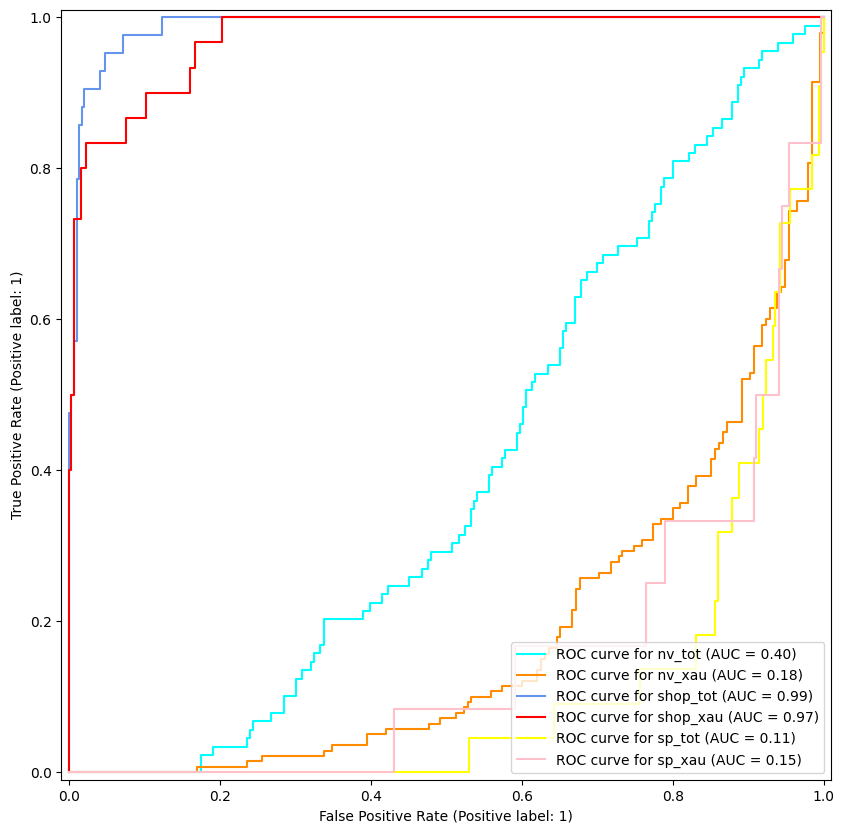

In [28]:
def ROC_curve_SVC(svc, X_test, y_test, class_names):
    # ax = plt.gca()
    # rfc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test, ax=ax, alpha=0.8)
    # svc_disp.plot(ax=ax, alpha=0.8)
    # plt.show()
    # predicted = svc.predict(X_test)
    predicted_proba = svc.predict_proba(X_test)
    # roc_auc = roc_auc_score(y_test, predicted_proba, multi_class='ovr')
    # print(roc_auc)
    target = label_binarize(y_test,
                        classes=pd.unique(y_test))
    fig, ax = plt.subplots(figsize=(10, 10))
    colors = cycle(["aqua", "darkorange", "cornflowerblue", "red", "yellow", "pink"])
    for class_id, color in zip(range(len(pd.unique(df['label']))), colors):
        RocCurveDisplay.from_predictions(
            target[:, class_id],
            predicted_proba [:, class_id],
            name=f"ROC curve for {class_names[class_id]}",
            color=color,
            ax=ax,
        )
    

ROC_curve_SVC(clf2, val_texts, val_labels, CLASS_NAMES)

Confusion matrix, without normalization
[[ 12   0   0   0   0   0]
 [  0  20   0   2   0   0]
 [  1   1  36   0   3   1]
 [  0   0   0  21   1   8]
 [  0   0   5   1 128   6]
 [  0   0   1   0   9  79]]
Normalized confusion matrix
[[1.         0.         0.         0.         0.         0.        ]
 [0.         0.90909091 0.         0.09090909 0.         0.        ]
 [0.02380952 0.02380952 0.85714286 0.         0.07142857 0.02380952]
 [0.         0.         0.         0.7        0.03333333 0.26666667]
 [0.         0.         0.03571429 0.00714286 0.91428571 0.04285714]
 [0.         0.         0.01123596 0.         0.1011236  0.88764045]]


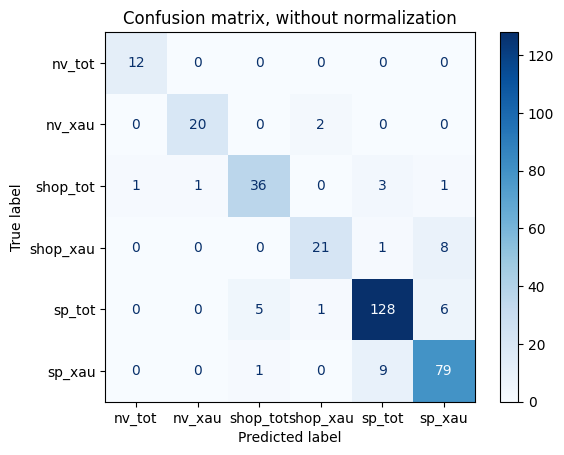

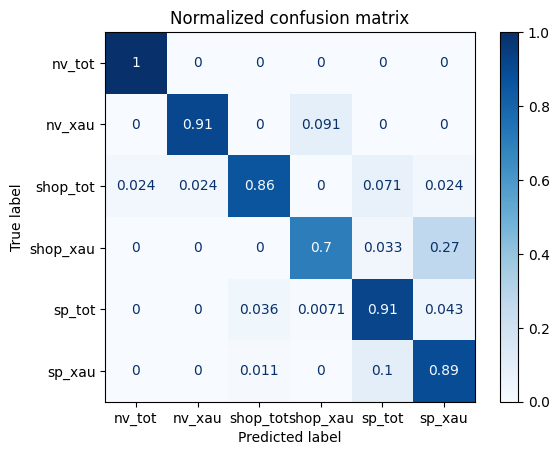

In [29]:
# def plot_confusion_matrix(cm, class_names):
#     plt.figure(figsize=(10, 8))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
#     plt.xlabel('Predicted')
#     plt.ylabel('True')
#     plt.title('Confusion Matrix')
#     plt.show()
# def visualize_confusion_matrix(clf2, model, dataset, test_labels, class_names):
    
#     true_labels = test_labels
#     predictions = []

#     # print(type(test_labels))
    
#     for idx, value in enumerate(dataset):
#         # print(type(test_labels.iloc[idx]))
#         preds = clf2.predict([value])
#         # true_labels.extend(test_labels.iloc[idx].to_numpy())
#         predictions.extend(np.argmax(preds, axis=1))
    
#     if true_labels.size > 0 and true_labels.iloc[0].size > 1:
#         true_labels = np.argmax([true_labels], axis=1)
    
#     cm = confusion_matrix(true_labels, predictions)
    
#     plot_confusion_matrix(cm, class_names)
    
    
# visualize_confusion_matrix(clf2, model, val_texts, val_labels, CLASS_NAMES)

def confusion_matrix_svc(clf2, X_test, y_test, class_names):
    titles_options = [
        ("Confusion matrix, without normalization", None),
        ("Normalized confusion matrix", "true"),
    ]
    for title, normalize in titles_options:
        disp = ConfusionMatrixDisplay.from_estimator(
            clf2,
            X_test,
            y_test,
            display_labels=class_names,
            cmap=plt.cm.Blues,
            normalize=normalize,
        )
        disp.ax_.set_title(title)
    
        print(title)
        print(disp.confusion_matrix)
    
    plt.show()

confusion_matrix_svc(clf2, val_texts, val_labels, CLASS_NAMES)

In [30]:

# import os.path
with open('model_lgr.model','wb') as f:
    pickle.dump(clf2,f)